In [53]:
#importing all necessary libraries
import string
import json
import codecs
import re
from wordcloud import WordCloud
from scipy.interpolate import make_interp_spline
import numpy as np
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from colorama import Fore, Back, Style
import pandas as pd
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [54]:
# Load the autoreload extension for Jupyter notebooks
%load_ext autoreload
%autoreload 1

# Importing RedditProcessing from the course material
%aimport ytProcessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
def vaderPrintTokens(lTokens, dSentimentScores):
    print(*lTokens, sep=', ')
    for cat, score in dSentimentScores.items(): #print each category and its score
        print(f'{cat}: {score}, ', end='')
    print()

In [56]:
def vaderSentimentAnalysis(youtubeFile, bPrint, youtubeProcessor):
    sentAnalyser = SentimentIntensityAnalyzer()
    lSentiment = []

    with open(youtubeFile, 'r') as f:
        youtubeDump = json.load(f)
        
        for video in youtubeDump:  # Looping through each video
            postText = video['title']
            postDate = video['posted_date']
            
            lTokens = youtubeProcessor.process(postText)
            dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))
            lSentiment.append([pd.to_datetime(postDate), dSentimentScores['compound']])  # Fixed conversion

            if bPrint:
                vaderPrintTokens(lTokens, dSentimentScores)
                
            for comment in video['top_50_comments']:
                lTokens = youtubeProcessor.process(comment)
                dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))
                lSentiment.append([pd.to_datetime(postDate), dSentimentScores['compound']])

                if bPrint:
                    vaderPrintTokens(lTokens, dSentimentScores)
            
    return lSentiment


In [57]:
# Input parameters and files
posWordFile = 'positive-words.txt'
negWordFile = 'negative-words.txt'
youtubeFile = 'combined_data.json'
flagPrint = True
approach = 'vader'

In [58]:
# Import your TextProcessing class
from ytProcessing import TextProcessing

# Constructing the TextProcessing object
tweetTokenizer = TweetTokenizer()
lPunct = list(string.punctuation)
lStopwords = stopwords.words('english') + lPunct + ['rt', 'via', '...', '…', '"', "'", '']
ytProcessor = TextProcessing(tweetTokenizer, lStopwords)

# Loading positive words text file
with open(posWordFile, 'r', encoding='utf-8', errors='ignore') as fPos:
    setPosWords = set(line.strip() for line in fPos)

# Load negative words text file
with open(negWordFile, 'r', encoding='utf-8', errors='ignore') as fNeg:
    setNegWords = set(line.strip() for line in fNeg)

# Compute the sentiment
lSentiment = []
if approach == 'count':
    lSentiment = countWordSentimentAnalysis(setPosWords, setNegWords, youtubeFile, flagPrint, ytProcessor)
elif approach == 'vader':
    lSentiment = vaderSentimentAnalysis(youtubeFile, flagPrint, ytProcessor)


musk, says, tesla, launch, robotaxis, less, year, positive, gene, munster
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.5141, 
guy, trying, keep, bless, heart
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.4215, 
oh, sure, count, space, karen, musk, saying, next, year, lot, tonight
neg: 0.0, neu: 0.813, pos: 0.187, compound: 0.3182, 
i'm, fence, guy, android
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
investments, proven, one, advantageous, choices, one, make, day, crypto, profits, consistently, contribute, significantly, overall, wealth, alleviating, need, rely, solely, salary
neg: 0.0, neu: 0.664, pos: 0.336, compound: 0.8225, 
’, odd, many, people, want, elon, fail, need, fail
neg: 0.637, neu: 0.274, pos: 0.089, compound: -0.8402, 
sincerely, cannot, wait, bitter, em, haters, eat, dirt, tsla's, market, cap, north, years, em, genius, created, technologically, advanced, car, company, world, also, valued, auto, company, globe, even, close, times, greater, toyota, fsd, robotaxi, semi, op

holy, looks, like
neg: 0.0, neu: 0.444, pos: 0.556, compound: 0.3612, 
beautiful, family
neg: 0.0, neu: 0.204, pos: 0.796, compound: 0.5994, 
praise, god, mother, raised, children, right
neg: 0.0, neu: 0.412, pos: 0.588, compound: 0.6908, 
beautiful, family, ❤, ❤, ❤
neg: 0.0, neu: 0.204, pos: 0.796, compound: 0.5994, 
love, family, ❤
neg: 0.0, neu: 0.192, pos: 0.808, compound: 0.6369, 
ah, hear, elon's, daughter, yes, keep, thinking, lovely, mother, raised, love, desire, tp, succeed, afraid, efforts, lovely, gorgeous
neg: 0.0, neu: 0.311, pos: 0.689, compound: 0.9761, 
gorgeous, ❤
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.6124, 
i'd, leave, vendor, offer, plenty, good, looking, family
neg: 0.119, neu: 0.594, pos: 0.287, compound: 0.4019, 
que, linda, minha, cunhada, ❤, ❤, ❤, aqui, brasil
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk's, mom, maye, reveals, get, family, discount, #tesla, #twitter, checkmark
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
shes, delicious, leave, 

cut, important, part, wanted, hear, say, stock
neg: 0.236, neu: 0.562, pos: 0.202, compound: -0.0772, 
wow, old, dirt, bag, said, like, money, helps, generate, money
neg: 0.139, neu: 0.347, pos: 0.514, compound: 0.7579, 
understand, industry
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
reason, would, invest, tesla's, he's, heavily, invested, gm
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh, im, warren, side, wont, invest, tesla, dollar
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
mr, warren, buffett, social, responsibility, better, tesla
neg: 0.0, neu: 0.674, pos: 0.326, compound: 0.4404, 
said, yes, tesla, stock, would, skyrocket
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
meet, sign, give, going, ok, ok, ok
neg: 0.0, neu: 0.377, pos: 0.623, compound: 0.6808, 
really, old, ppl, like, dont, typically, invest, ev, companies, expected, different, answer, also, tesla, market, unpredictable, u, nurves, steel, invest, ton, money
neg: 0.0, neu: 0.879, pos: 0.121, compound: 0.41

course, elon, simps, broke, stupid, buy, tesla, shares, hey, least, supported, internet, words, that's, valuable, money, right
neg: 0.321, neu: 0.471, pos: 0.208, compound: -0.4333, 
elon, overpaid, billion, twitter, lost, billion, net, worth, least, owns, libs, lol
neg: 0.144, neu: 0.562, pos: 0.294, compound: 0.34, 
buzz, mark, generated, meta, seems, like, musk, actually, one, living, fantasy, digital, world, smart, good, let's, try, prevent, another, nietzschean, mental, breakdown, genius
neg: 0.0, neu: 0.674, pos: 0.326, compound: 0.802, 
elon, kicking, liberal, cult, curb, .., great, expense, nearly, billion, reinvent, personal, brand, tesla, cars, appeal, masses, probably, tesla, stock, still, valued
neg: 0.0, neu: 0.741, pos: 0.259, compound: 0.7906, 
man, purports, revere, intelligence, he's, bonehead
neg: 0.0, neu: 0.617, pos: 0.383, compound: 0.4767, 
_да, им, €, обясни, правилно, пасажерски, екипаж, €, _състав, от, интернационални, международни, обиграни, играчи, които, мог

elon, friends, preparing, leave, planet
neg: 0.164, neu: 0.411, pos: 0.425, compound: 0.4404, 
another, blind, defender, elon, reads, script, well, elon, hack, whose, ego, surpassed, wallet, guy, joined, bill, maher, bro, love, triangle, elon
neg: 0.099, neu: 0.62, pos: 0.281, compound: 0.6124, 
musk, essential, tesla, make, sure, keep, team, hard, working, engineers
neg: 0.12, neu: 0.684, pos: 0.197, compound: 0.2263, 
elon, said, tesla, that's, he's, going, first, one, invest, last, one, buy, another, lie, great, genius, elon, lol
neg: 0.0, neu: 0.699, pos: 0.301, compound: 0.7845, 
space, x, going, make, within, year, ’, going, burn, money, like, meta
neg: 0.0, neu: 0.783, pos: 0.217, compound: 0.3612, 
musk, filed, another, sec, form, form, shows, elon, musk, sold, around, million, shares, raise, billion, tesla, wk, high, currently, sells, around, stock, ridiculously, priced, tesla's, p, e, ttm, finbox, generous, graham, formula, value
neg: 0.064, neu: 0.724, pos: 0.212, compound: 

money, going, mars
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
tesla, stock, concerns, lie, around, ‘, brand, damage, ’, elon, musk, twitter, analyst
neg: 0.242, neu: 0.758, pos: 0.0, compound: -0.4939, 
elon, admired, balls, taking, risk, purchasing, twitter, peers, limited, minds, go, get, life, twitter, fbi, needed, stopped, musk, national, hero
neg: 0.212, neu: 0.54, pos: 0.248, compound: 0.4588, 
❤, 😂, 🎉
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
exactly, tesla, ownership, say, owner, driver, elon, made, difficult, seen, tesla
neg: 0.2, neu: 0.8, pos: 0.0, compound: -0.3612, 
according, tufts, university, fletcher, school, business, study, twitter, seen, increase, antisemitic, ethnic, hate, speech, anti-lgbtq, mention, volume, pre-musk, period, post-musk, period
neg: 0.148, neu: 0.76, pos: 0.092, compound: -0.34, 
probably, tesla, target, market, think, brand, toxic, trump, hotel, would, never, patronize, getting
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
musk, manufacturi

stuff, 😮, vote, blue, 💙, 🎉
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
wish, worked, elon's, company, worked, many, hours, company, many, years, many, reorgs, sometimes, discriminated, leaders, company, took, dei, approach, completely, burned, stock, value, years, even, know, i'd, able, retire, comfortably
neg: 0.0, neu: 0.768, pos: 0.232, compound: 0.8, 
didnt, inherit, huge, workforce, twitter, x, bought
neg: 0.282, neu: 0.718, pos: 0.0, compound: -0.2411, 
want, hear, present, employees, vs, hand, picking, people, might, really, like
neg: 0.0, neu: 0.523, pos: 0.477, compound: 0.7425, 
disappointment, elon, turning
neg: 0.623, neu: 0.377, pos: 0.0, compound: -0.5106, 
military, personnel, vote, trump
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
problem, noone, try, like, souls, copied, thats, uniqueness, follow, guidance, times, people, try, like, every, soul, thats, universe, designed, interfere, souls, roles, assigned, universe
neg: 0.094, neu: 0.732, pos: 0.174, compound: 0.31

hey, still, good
neg: 0.0, neu: 0.408, pos: 0.592, compound: 0.4404, 
name, name, communist, dictator
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
classic, musk, features, available, next, year, next, year, never, arrive
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
jesus, guy, grifts, trump
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, able, buy, phone, also, would, love, talk, model
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.6369, 
still, waiting, cellular, know, one
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
hi
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
hello, mahal, 👩‍❤, ️‍👨, 💞, 🍷, 💍, ❤, ️, 🌹, 💃, 🕺, pang, elon, pagparty, karon, magtagumpay, akung, gihimo, marketing, dax, nimo, tama, tanan, akung, answers, marketing, dax, sa, berlin, daghang, kaayong, salamat, sa, ginoo, nimo, tanan, naa, ko, nimo, mga, tawo, masuko, nimo, magwar, sila, ako, ang, mo, atubang, nila, tanan, mangutana, ko, unsa, diay, sala, nga, samok, mo, tanan, ako, ang, kalabang, nila, tanan, bantay,

elon, diplomatic, said, he's, interested, india, he's, actually, interested
neg: 0.0, neu: 0.565, pos: 0.435, compound: 0.6597, 
tesla, chose, mexico, 🇲🇽, 👏🏼, 👏🏼, 👏🏼, 👏🏼
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, better, start, roads
neg: 0.0, neu: 0.286, pos: 0.714, compound: 0.6124, 
tesla, india, give, tax, incentives, develop, ev, market, 😊
neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.3182, 
tesla, soon, building, gigafactory, india, 😁
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
porky, always, constipated
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
buy, country, make, india, better
neg: 0.0, neu: 0.58, pos: 0.42, compound: 0.4404, 
plant, india, sorry, political, corruption, stifling, bureaucracy, untenable, india, bureaucratic, nightmare, business, friendly, worth, time, super, stuck, past
neg: 0.13, neu: 0.514, pos: 0.356, compound: 0.7717, 
taste, 😋, apple, 🍎, 🍏, 🍏, 🍎
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
tesla, needs, india, way, round
neg: 0.0, neu: 1.0, 

account, taken, well, pandoras, box, blown, open, bad, fake, news
neg: 0.42, neu: 0.446, pos: 0.134, compound: -0.6705, 
power, stop, stalkers, surveying, spying, every, move, twenty-four, seven, days, week, three, hundred, sixty, five, days, year
neg: 0.121, neu: 0.879, pos: 0.0, compound: -0.296, 
account, suspended
neg: 0.756, neu: 0.244, pos: 0.0, compound: -0.4767, 
delay, reasonable
neg: 0.697, neu: 0.303, pos: 0.0, compound: -0.3182, 
amen, praise, lord
neg: 0.0, neu: 0.357, pos: 0.643, compound: 0.5574, 
elon, correct, 👍
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
although, wrong, kinda, seems, hypocritical, information, already, public, guy, making, mainstream, obviously, consequences, like, private, information, .., idk, im, lost, one
neg: 0.34, neu: 0.571, pos: 0.089, compound: -0.7203, 
manbaby, ’, control
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
legal, stalk, someone, ’, jet, usage, creep, looking, windows, hiding, bushes, illegal, stalking
neg: 0.356, neu: 0.552, p

well, ford, many, lawsuits, resolved, billions, dollars, plus, issues, ev's, trucks, mustangs, gm, bolt's, recalls, batteries, fires, electronic, issues, volkswagen, chrysler, scams, diesel, engines, polluting, mercedez, i've, hearing, reading, listening, manufacturer's, issues, recalls, excuses, plus, lawsuits, mostly, settled, nda, people, said, lawsuits, dealers, spent, years, lying, customers, scamming, even, telling, customers, recalls, pertaining, cars, brand, tesla, shaken, car, industry, created, started, producing, cars, dealers, per, say, manufacturers, within, years, never, changed, models, really, improved, cars, updated, software, work, unlike, manufacturers, throughout, years, changes, model, every, years, new, engines, transmissions, rear, end, etc, never, got, right, hey, ok, bringing, new, model, next, year, 🤣, 😂, 🤣, like, tesla, achieved, little, time, they've, existed, 😉, hopefully, new, batteries, created, implemented, increase, range, km, charges, everywhere, 😉
neg

rate, homeboy, fina, working, us, amazon, years
neg: 0.0, neu: 0.779, pos: 0.221, compound: 0.1779, 
waiting, share, buy, penny, still, company, future, tons, quality, competitors, ’, catch, fire, much, better, ceos, elon
neg: 0.117, neu: 0.634, pos: 0.249, compound: 0.4019, 
🤔, 👍🏿
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
cost, sell, price, make, fortune, wish, fans, pay, super, star, buy, elon, real, fans, see, per, share
neg: 0.06, neu: 0.56, pos: 0.379, compound: 0.8126, 
lower, tesla, goes, bullish, get
neg: 0.355, neu: 0.645, pos: 0.0, compound: -0.296, 
know, could, work, retirement, meanwhile, people, putting, thousands, dollars, meme, coin, multimillionaires, big, thanks, joseftrade
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.4404, 
oh
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
pay, taxes
neg: 0.583, neu: 0.417, pos: 0.0, compound: -0.1027, 
well, sabotaged, tesla, brand, antics, good, idea, unload, stock, drops
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.6124, 
ros

make, subway
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
much, city, pay, elon, musk, build, money, drug, rehabilitation, addiction, affordable
neg: 0.123, neu: 0.877, pos: 0.0, compound: -0.1027, 
nwo, 😋
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
guy, dangerous, ’, get, ppl, ’, see, danger, boy, planet, space, atmosphere, “, hey, ’, put, car, space, .., purpose
neg: 0.317, neu: 0.683, pos: 0.0, compound: -0.7579, 
use, busses
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
happened, vegas, likely, stay, vegas
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
🤣, 🤣, 🤣
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
wie, weit, ist, es, erdbeben, sicher, 🤔
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
get, coast, coast, denver, california
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
bad, someone, breaks, ..
neg: 0.538, neu: 0.462, pos: 0.0, compound: -0.5423, 
think, underground, train, would, far, efficient
neg: 0.0, neu: 0.641, pos: 0.359, co

positive, vibes, even, stock
neg: 0.0, neu: 0.455, pos: 0.545, compound: 0.5574, 
tsla, closed, today, lol
neg: 0.0, neu: 0.517, pos: 0.483, compound: 0.4215, 
tsla, 📈
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
man, word
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
dip, early, trading, day, say, dip
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
👆, 👆, thanks, 🙏, continuous, great, 😊, videos, feel, would, allow, market, dynamism, determine, trade, either, new, space, general, probably, naïve, sphere, seen, far, worse, times, enlightened, traders, continue, make, good, use, dip, pump, even, acquiring, equities, towards, trading, sessions, l'd, say, emphasis, put, trading, since, way, profitable, holding, trading, went, smooth, able, raise, b, c, started, b, tc, weeks, implementing, trades, signals, insights, travis, neil, would, advise, y'all, trade, asset, rather, hold, future, sure, 🔝, 🔝, 🔝
neg: 0.036, neu: 0.671, pos: 0.293, compound: 0.9648, 
reminder, cnbc, sponsored, ford, gm
ne

laugh, yahoo, always, bearish, crying, years
neg: 0.29, neu: 0.374, pos: 0.336, compound: 0.128, 
lol, always, dot, say, tesla, bad, buy, tesla, stock, goes, please, give, pessimistic, comments, know, time, buy, tesla, seems, better, tesla, want, talk, keep, good, work, payed, house, tesla, stock, got, go, time, time, buy, 😉, 😉, 😉, 😁, 😁
neg: 0.13, neu: 0.606, pos: 0.264, compound: 0.6369, 
event, going, comedic, gold, tuning
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
sell, news, event, price, drops, every, single, time, anything, substantially, positive, released, points, market, manipulation, cell, news, events, funny, every, time, tesla, one, show, something, ridiculously, remarkable, end, executing, price, goes, moon, executed, i'm, sure, there's, coincidence, lot, billionaires, borrowed, money, personal, stocks, play, stock, market, borrowed, money, avoid, taxed, income, puts, tesla, i'm, sure, there's, market, manipulation
neg: 0.121, neu: 0.645, pos: 0.234, compound: 0.

offcourse, elites, want, tesla, die, wasnt, elite, went, short, teala, lost, billions, elon, musk, wayyy, tooo, based, really, thinks, small, guy, elite, wants
neg: 0.225, neu: 0.727, pos: 0.047, compound: -0.7096, 
hell, twitter, dead, bastards, closed, account, views, twitter, suck, big, one, bernie, kiss, ass
neg: 0.641, neu: 0.266, pos: 0.093, compound: -0.9552, 
tesla, stock, rebounds, one, understands, economics, cares, bernie, sanders
neg: 0.0, neu: 0.727, pos: 0.273, compound: 0.4588, 
waaaaa, broke, lil, twitter, rules, waaaaaa, waaaaa, mommy
neg: 0.286, neu: 0.714, pos: 0.0, compound: -0.4215, 
haaaa, yahoo, fake, news, lmaooo
neg: 0.437, neu: 0.563, pos: 0.0, compound: -0.4767, 
solana, best, investment, days, tesla, bitcoin, avax, gold
neg: 0.0, neu: 0.625, pos: 0.375, compound: 0.6369, 
fake, report
neg: 0.756, neu: 0.244, pos: 0.0, compound: -0.4767, 
elon, musk, give, security, money, amber, turd, severed, depp, ’, finger, paying, taxes, ’, unreasonable
neg: 0.157, neu: 

shorting, market, elon
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
fieta, famoso, todo.no, ynporta, pais, sea
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
get, clown
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
layoffs, middle, massive, labor, shortage, musk, making, big, mistake, fun, trying, hire, back, barely, keep, demand
neg: 0.269, neu: 0.574, pos: 0.158, compound: -0.0828, 
ford, gm, volkwagon, porche, mecrecedes, increasing, investments, evs, increasing, head, counts, elon, musk, reduction, head, counts, sound, fishy, indicate, tough, environement, richest, planet, idiot, revoerse, policy, head, count
neg: 0.145, neu: 0.753, pos: 0.102, compound: -0.1027, 
think, elon, way, abscessed, twitter, elon, keep, eye, ball
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
moving, towards, bible, says, war, armageddon, globilization, advent, one, world, one, world, government, one, economy, one, global, citizenship, advent, anti-christ, one-man, ruler, world, grand, climax, second, comi

pathetic, woman, embarrassed, drive, tesla, elons, actions, get, grip, narcissist, clearly, privileged, ’, behave, ps, minerals, mined, ground, power, tesla, good, planet, stop, kidding
neg: 0.245, neu: 0.466, pos: 0.289, compound: 0.128, 
people, need, grow, drive, car, happy, go, another, electric, car, unhappy
neg: 0.181, neu: 0.581, pos: 0.239, compound: 0.2263, 
elon, musk, educated.he, solve, issue, may, come, way, like, alot, 🥰, ✝, ️, 👍, feel, confidence
neg: 0.0, neu: 0.542, pos: 0.458, compound: 0.765, 
need, tesla, like, need, hole, head
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.3612, 
🖖
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
live, california, literally, half, charging, stations, ’, work, friends, evs, complain, constantly, ’, thankful, hybrid, support, electric, cars, far, able, replace, gas, cars, sadly, ’, even, get, charging, stations, right
neg: 0.144, neu: 0.598, pos: 0.258, compound: 0.6369, 
elon, enabling, nazis, twitter, want, support, buying, tesla
neg: 

smart, vote, america, vote, family, children
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
perdón, este, país
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
todos, votar, por, trump, así, estaremos, llevando, este, hacer, más, prospero
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
ganará, trump, es, la, salvación, de, este, gran, país, . ., en, económico, estaremos, mejor, votar, por, lod, republicanos
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
scam, artist, billionaire, ganging, would, simple, people, expect, interests, heart, that's, something, never, understand, end, story, easy, predict, big, hangover, coming, ..
neg: 0.134, neu: 0.688, pos: 0.178, compound: 0.0516, 
big, support, s.korea
neg: 0.0, neu: 0.426, pos: 0.574, compound: 0.4019, 
god, bless, america
neg: 0.0, neu: 0.169, pos: 0.831, compound: 0.5994, 
mr, elon, people, died, donald, mr, joe, biden, withdrew, troops, afghanistan, might, withdrawn, troops, ukraine, trump, believes, america, feared, kind, talk, fav

handle, bought, shares, start, somewhere, buy, gets, etc
neg: 0.0, neu: 0.761, pos: 0.239, compound: 0.296, 
smart, elon, cut, middlemen, .., highly, corrupted, .., restructuring, industry
neg: 0.164, neu: 0.625, pos: 0.211, compound: 0.1531, 
good, luck, mining, elon, machines, could, help, kinda, like, machine, bore, earth, boring, machine, kind
neg: 0.154, neu: 0.305, pos: 0.541, compound: 0.8799, 
amazing, progress, cnbc, discussing, tesla, hear, anything, completely, outrageous, actually, relatively, speaking, made, sense
neg: 0.158, neu: 0.526, pos: 0.316, compound: 0.5118, 
well, looks, like, ’, time, overthrow, government, bolivia, thanks, elon
neg: 0.0, neu: 0.444, pos: 0.556, compound: 0.7579, 
march, month, xos, .., large, ev, trucks, revenue, yr, yr, increasing, deliveries, pre-orders, semi, truck, returns, production, recent, fed, ex, ev, truck, deliveries, march
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
tesla, stated, bought, lithium, mine, nevada, battery, day, well


musk, win, twitter, failed, present, data, 🤷🏼‍♂, ️, hopefully, twitter, crashes, burns
neg: 0.185, neu: 0.449, pos: 0.365, compound: 0.4939, 
finish, deal, restore, free, speech, already, people, waiting
neg: 0.0, neu: 0.522, pos: 0.478, compound: 0.6705, 
greedy, pigs
neg: 0.697, neu: 0.303, pos: 0.0, compound: -0.3182, 
past, days, economic, instability, inflation, recession, watching, crypto, portfolio, decline, disheartening, holding, really, profit, much, idea, earn, better, short, run
neg: 0.202, neu: 0.578, pos: 0.22, compound: 0.1263, 
musk, far, beyond, peak
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
🙏, ✌, ️, ✌, ️, ✌, ️, 🇮🇳
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
billion
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
dudes, beach, pics, .., 🤮, 🤮, 🤮, 😂
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
legal, war, chest, i'm, sure, legal, team, definitely, expensive, seems, convenient, insufficient, explanation, selling, shares, ultimately, always, allow, deference, large, s

hey, i'm, else, ever, said, publicly, privately, hell, needs, done, get, phone, also, elon, chris, j, lydon
neg: 0.235, neu: 0.765, pos: 0.0, compound: -0.6808, 
silv, 🎉
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
ofc
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
heard, bet, farm, dogecoin
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
around, long, time, cant, pay, rent, buy, food, anything, buy, daily, life, dont, know, single, real, life, person, even, mention, much, less, crypto, pyramid, scheme, never, gonna, main, currency, used
neg: 0.0, neu: 0.957, pos: 0.043, compound: 0.0762, 
crypto, currency, turned, one, big, scam
neg: 0.425, neu: 0.575, pos: 0.0, compound: -0.5719, 
sorry, question, seems, stupid, anyone, know, transfer, usdt, bitget, wallet, binance, following, words, scrub, know, faith, win, siren, become, slot, notice, chuckle, shift, extra, password, information, possible, withdraw, using, phrase
neg: 0.121, neu: 0.641, pos: 0.238, compound: 0.6808, 
little, know, pr

oh, sarcasm
neg: 0.655, neu: 0.345, pos: 0.0, compound: -0.2263, 
sinking, elon, money, 🚫, brains
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
bought, tesla, devalue, age, also, tesla, lowered, price, new, cars
neg: 0.143, neu: 0.857, pos: 0.0, compound: -0.128, 
good
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.4404, 
hear
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
lmao, let, stock, sink, musk, time, tesla, .., cares, twitter
neg: 0.0, neu: 0.537, pos: 0.463, compound: 0.7845, 
😂
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
😂, 😂, 😂
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
w, elon
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yea, musk, deserves
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
billion, old, boy, spent, myspace, coulda, spent, r, improving, fit, finish, making, car, look, like, something, saturn
neg: 0.0, neu: 0.625, pos: 0.375, compound: 0.7783, 
type, cars, really, play, price, sense, energy, efficient
neg: 0.0, neu: 0.397, pos: 0.603, compound: 0.7645, 
rebate, t

fack, haters, leave, man, alone, want, high, let, he's, struggling, work, last, man, since, edison
neg: 0.449, neu: 0.488, pos: 0.063, compound: -0.7845, 
lol, ’, dumb, af
neg: 0.465, neu: 0.141, pos: 0.394, compound: -0.128, 
take, one, hit, marijuana, stocks, drop, worth, kids
neg: 0.21, neu: 0.6, pos: 0.19, compound: -0.0516, 
embrace, holy, tree, start, wave, future
neg: 0.0, neu: 0.685, pos: 0.315, compound: 0.3182, 
everyone, ’, stock, drops, ’, joe, rogan, show
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
stocks, fluctuate, time, pay, attention, see, ’, say, much, could, drop, fraction, want, make, news, podcast, ’, bring, sales, watch
neg: 0.177, neu: 0.758, pos: 0.066, compound: -0.296, 
feel, podcast, increase, sales, stocks, watch
neg: 0.0, neu: 0.685, pos: 0.315, compound: 0.3182, 
tobacca, lmao
neg: 0.0, neu: 0.204, pos: 0.796, compound: 0.5994, 
nbc, sucks, dislike, nbc
neg: 0.718, neu: 0.282, pos: 0.0, compound: -0.6249, 
nbc, trash
neg: 0.0, neu: 1.0, pos: 0.0, compoun

tesla, founders, registered, company, july, elon, invested, feb, must, reached, months, prior, looking, timelines, much, time, difference, founders, elon, gap, months, . ., short, interval, wonder, much, invention, proprietary, software, hardware, created, elon, claims, cofounder, .., every, one, startup, co-founders, bring, tons, ideas, table, risk, everything, rarely, belives, others, zeal, knowledge, money, efforts, means, lot, journey, building, successful, company
neg: 0.034, neu: 0.851, pos: 0.116, compound: 0.6249, 
neither, mark, eberhard, elon, musk, came, tesla, god, gave, named, tesla, soon, revealed
neg: 0.0, neu: 0.851, pos: 0.149, compound: 0.2732, 
wrote, letter, stuck, envelope, stamped, addressed, mr, eberhard, tesla
neg: 0.2, neu: 0.8, pos: 0.0, compound: -0.25, 
core, minds
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk, tweets, started, tesla, big, auto, companies, tried, kill, electric, car, cnbc
neg: 0.281, neu: 0.719, pos: 0.0, compound: -0.6908, 
thoug

questions, reliability, longevity, electric, trucks, remain, significant
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.2023, 
teslas, ability, scale, production, maintaining, quality, standards, closely, watched
neg: 0.0, neu: 0.777, pos: 0.223, compound: 0.3182, 
concerns, job, displacement, due, autonomous, technologies, need, careful, consideration
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.1531, 
tesla, previously, reported, simi, designed, git, go, space, sleeper, modifications, done, current, body, stretching, frame, required
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
great, shots, sleeper, cab, area, 😂
neg: 0.0, neu: 0.494, pos: 0.506, compound: 0.6249, 
goods, become, less, expensive, end, users, benefit, cleaner, air, lower, inflationary, pres, ures, solar, roof, panels, recharge, batteries, parked, enroute, self, driving, transport, vehicles, haul, toxic, flammable, materials, auto, driven, replace, teamster, truckers, 😮
neg: 0.06, neu: 0.813, pos: 0.127, compound: 0.36

wsj, definitely, touch, still, hold, old, economy, view
neg: 0.0, neu: 0.722, pos: 0.278, compound: 0.4019, 
wow, china, telling, us, go, moon
neg: 0.0, neu: 0.568, pos: 0.432, compound: 0.5859, 
grow, countries, assembly, plants, local, company, partnership, beat, high, import, tariffs, .., efficient, partnership, developing, countries, much, corruption, red, tape
neg: 0.0, neu: 0.872, pos: 0.128, compound: 0.4215, 
tesla, still, baby, car, market
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
issue, telsa, elon, dependent, needs, find, dependable, quickly, like, jobs, found, tim, cook
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.3612, 
wsj, thinks, replacing, ice, car, factories, ev, easy, snap, fingers, lol, major, challenges, new, technology, staffs, ice, technology, ’, use, old, engineers, new, r, expenses, new, expenses, machineries, got, design, old, technology, machineries, sell, cheap, throw, away, one, better, starting, scratch, without, dealing, old, dead, weight
neg: 0.0, n

trump, elon, kennedy, future, humanity, peace, must, stop, evil, corruption, whot, try, kill, us
neg: 0.456, neu: 0.403, pos: 0.141, compound: -0.8316, 
✨, 🙏🏻, 🕊, ️, 🪽, ⚔, ️, 🎖, ️, 🏆, ✝, ️, 🏆, 🎖, ️, ⚔, ️, 🪽, 🕊, ️, 🕊, ️, 🕊, ️, 🇺🇸, 🇮🇱, 🇺🇸, 🕊, ️, 🕊, ️, 🕊, ️, 😎, 🙏🏻
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
dark, maga, undercover, works, lord, jesus, christ, amen, elon, 🎖, ️, 🏆, 🎖, ️
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
trump, antithesis, elon, elon, workaholic, innovator, visionary, trump, work, shy, liar, elon, cavorting, around, stage, trump, juvenile, small, “, p, ”, politically, naive, trump, sing, virtues, long, useful, campaign, discard, faster, used, tissue, elon, longer, asset
neg: 0.206, neu: 0.547, pos: 0.247, compound: 0.4404, 
hate, dimocratic, party, embracing, fascist, dictator, trump, answer, jeannine
neg: 0.456, neu: 0.375, pos: 0.169, compound: -0.6808, 
feel, incredibly, let, elon, ’, sad, see, toadying, lowlife, character, one, repeatedly, called, green, ene

slashing, prices, spending, advertising, reveal, far, drop, demand, tesla, vehicles
neg: 0.449, neu: 0.551, pos: 0.0, compound: -0.5719, 
buti, kayo, kumita, sa, ginawa, ko, pang, lalaro, ng, currency, nayan, sira, pangalan, mo, sa, tao, sira, pa, utak, mo, ng, kabuhay, ung, laro, dahil, sa, ginawa, ko, sira, buhay, ko, lahat, kawalan, kayo, guminhawa, buhay, ko, sirang, sira
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
musk, world's, greatest, degenerate
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.6369, 
know, i'm, still, thinking, kia, ad, ev, outlining, kia, features, ev, find, caring, little, tesla, model, given, kia, knows, damn, well, tesla, features, can't, ever, dream, charging, infrastructure, related, experience, on-demand, fsd, ever-green, ota, updates, individual-based, insurance, rate, computer-on-wheels, battery-driven, dumb, wagons, name, think, long, opportunity, effectively, fool, enough, customers, remains, continue, old-fashioned, mediocre, ads, entities, ad, ecos

want, mess, good, #realnews
neg: 0.325, neu: 0.13, pos: 0.545, compound: 0.1779, 
elon, musk, actually, bought, twitter
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
think, elon, genius, bitten, chew, see, know, tesla
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
tbh, think, elon, cares, people, like, he's, thats, twitter, longer, twitter, think, he's, buying, start, somewhere, completely, reform, platform, needs, think, he's, stupid, think, he's, pretty, smart, think, he's, purpose, we'll, see
neg: 0.081, neu: 0.646, pos: 0.273, compound: 0.7906, 
’, happens, ’, rich, ’, surprised, man, hopefully, stay, bright, side
neg: 0.0, neu: 0.265, pos: 0.735, compound: 0.8779, 
giving, way, much, credit, merit, he's, average, evil, billionaire
neg: 0.256, neu: 0.291, pos: 0.453, compound: 0.34, 
x
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
kidding, right
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.1027, 
estamos, vivendo, em, uma, ditadura, da, brasil, está, refém, judiciário, até, hoje, n

sounds, lot, like, ebenezer, scrooge, someone, promotes, need, children, would, time, husbands, wives, family, elite, slave, drivers, world, think, gain, effects, others, people, call, hero, opinion
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.8979, 
gra, u, arata, long, bed, 😜
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
get, paid, he's, clearly, beyond, ambitious, needs, overwork, brilliant, minds, achieve, vision, cant, handle, heat, stay, kitchen, suppose
neg: 0.0, neu: 0.547, pos: 0.453, compound: 0.891, 
sleeping, factory, makes, lot, sense, wanna, avoid, california, traffic, bs
neg: 0.196, neu: 0.804, pos: 0.0, compound: -0.296, 
elon, mask, sorry, many, ugly, world, since, became, caring, man, th, devils, people, never, leave, alone, bad, people, thank, child, god, amen
neg: 0.238, neu: 0.373, pos: 0.389, compound: 0.5003, 
successful, business
neg: 0.0, neu: 0.208, pos: 0.792, compound: 0.5859, 
high, performer, go, find, somewhere, else, work, room, average, everywhere, els

twitter, become, new, truth, social, gab, getter, place, racist, white, nationalists, come, together, maga, destruction, america
neg: 0.335, neu: 0.565, pos: 0.1, compound: -0.7506, 
cia, reptiles, gotta, pissed
neg: 0.583, neu: 0.417, pos: 0.0, compound: -0.6369, 
strong, together, 🎯, 🇨🇦, 🇺🇸
neg: 0.0, neu: 0.476, pos: 0.524, compound: 0.5106, 
musk's, talk, unlike, trump, disjointed, prose, everywhere, somehow, connected, something
neg: 0.204, neu: 0.796, pos: 0.0, compound: -0.3182, 
line, pockets
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
amazing, see, twitter, stocks, soaring, negative, analyses, following, elon's, interests, take, opinions, analysts, pinch, salt, always
neg: 0.164, neu: 0.578, pos: 0.258, compound: 0.2732, 
quality, life, user, experience, building, better, ever, seen
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
fuckin, ❤, elon, 🚀, 🚀, 🚀
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
many, bots, china, russia, promoting, right, wing, fascist, agenda, try,

elon, musk, like, private, jet, tracked, twitter
neg: 0.0, neu: 0.706, pos: 0.294, compound: 0.3612, 
😍
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
british, man, ’, claim
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
taylor, swift, prior, also, complained
neg: 0.36, neu: 0.4, pos: 0.24, compound: -0.2263, 
elon, free, speech, without, exceptions, except, effects, thats, different
neg: 0.0, neu: 0.708, pos: 0.292, compound: 0.5106, 
elon, make, whatever, wants, owns, mf
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
people, musk's, pr, team, paid, self, praising, bot, farms, compare, stalking, really, simple, minded, likes, view, good, light, fraudster, tesla, muski, good, enviroment, let, show, using, private, plane, every, day, burn, coal, feed, tesla, cars
neg: 0.076, neu: 0.654, pos: 0.27, compound: 0.8344, 
wow, devious, musk, want, real-time, whereabouts, published, every, lunatic, whole, entire, world, times, obvious, abuse, platform, ’, glad, put, end, decision, no-brainer, any

correction, tesla, worth, however, valued, thing, might, actually, make, worth, amount, manage, monopolize, charging, station, infrastructure, multiple, countries, likely, wont, definitely, trying, tho
neg: 0.141, neu: 0.626, pos: 0.233, compound: 0.3903, 
get, stocks, enough, company, worth, company, b, revenue, assets, net, profit, company, b
neg: 0.0, neu: 0.552, pos: 0.448, compound: 0.6705, 
genuinely, hate, elon, musk, want, see, fail, lol, could, elon, raise, equity, twitter, solve, problems, like, private, placement, offerings, ’, sure, still, institutions, willing, invest, twitter, long, price, cheap, enough, sure, elon, willing, give, voting, rights, ’, megalomaniac, guess
neg: 0.194, neu: 0.55, pos: 0.255, compound: 0.0258, 
fun, fact, global, economic, slow, fact, america, fucked, certain, countries, provide, supply, brics, going, cause, massive, ripple, western, economies
neg: 0.171, neu: 0.62, pos: 0.209, compound: 0.0, 
goverment, save, like, billionair, taxpayers, money

money, anything, admire, buffet, gates, jobs, alive, dislike, musk, power-hungry, megalomaniac
neg: 0.16, neu: 0.491, pos: 0.35, compound: 0.4767, 
kinda, crazy, nobody's, talking, forbidden, jewish, ebook, called, jewish, fifth, rule
neg: 0.353, neu: 0.647, pos: 0.0, compound: -0.6003, 
problem, rich, taxes, 🤦🏿‍♂, ️, imagine, winning, lottery, every, quarter, half, goes, uncle, sam, 😢
neg: 0.137, neu: 0.508, pos: 0.355, compound: 0.6486, 
🔐, 🦘
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
teach, us, vripto, ellon
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
thanks, forecast, need, advice, okx, wallet, holds, usdt, seed, phrase, air, carpet, target, dish, jeans, toilet, sweet, piano, spoil, fruit, essay, could, explain, move, binance
neg: 0.0, neu: 0.796, pos: 0.204, compound: 0.7096, 
cannot, stand, sucking, interviewers
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
haters, need, completely, silenced, envy, jealousy, coveting, people's, stuff, absurd, see, elon's, put, chopping, bloc

show, hands, would, like, see, stuff, come, crashing
neg: 0.0, neu: 0.737, pos: 0.263, compound: 0.3612, 
taliban, active, twitter, account, donald, trump's, banned
neg: 0.28, neu: 0.467, pos: 0.252, compound: -0.0772, 
delete, channel
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
bunch, clowns, acting, like, know, anything, 🤣
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.3612, 
imagine, worshipping, guy, got, destroyed, joe, biden, election, even, close
neg: 0.232, neu: 0.58, pos: 0.188, compound: -0.1531, 
that's, billion, toilet, 💩, 🙈, twitter, new, myspace, 🤣
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
let, gutting, begin
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
cnbc, rip, right, next, tube, elon, adds, video, streaming, worry, leftists, treat, exactly, treated, us, bwahahahahaha
neg: 0.148, neu: 0.714, pos: 0.138, compound: -0.0516, 
good, run, better
neg: 0.0, neu: 0.147, pos: 0.853, compound: 0.7003, 
needs, buy, new, station, like, cnbc, reporting, like, giving, 🤡, voice

loves, islands, though
neg: 0.0, neu: 0.351, pos: 0.649, compound: 0.5719, 
vocês, tem, que, reprogramar, pela, central, da, legião, quem, tem, almas, agora, eu, usei, frequência, af, como, reprogramação, celetores, ouvidos, estômago, coração, rins, pâncreas, índico, arrumar, um, psiquiatra, que, faça, isso, frequência, de, reprogramação, celebral, existem, em, várias, ondas, theta, beta, zheta, são, demônios, virtualizados, atravéz, só, seu, celebro, pq, falam, que, homem, só, usa, metade, celebro, então, tem, frequência, ativação, celebro, então, que, eu, fiz, foi, programar, caso, você, tem, que, usar, som, e, se, auto, programar, falar, eu, nome, completo, autorizo, minha, programação, manual, aí, você, tem, que, reativar, os, pontos, energia, fala, eu, ativo, todos, meus, pontos, de, energia, ou, chackas, eu, desativo, toda, virtualização, celebral, e, compartilhamento, desativo, todo, comando, todo, acesso, especial, em, meu, celebro, vc, fala, iniciando, programação, porém, usa,

dimond, epstein, captured, government, photos
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
going, run, president, okay, cool
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.4939, 
hope, american, people, eliminate, bankster, mobsters, like, jamie, dimon
neg: 0.214, neu: 0.414, pos: 0.372, compound: 0.3182, 
full
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
many, christmas, 🎄, ⛄
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
pick, interest, rate
neg: 0.0, neu: 0.4, pos: 0.6, compound: 0.4588, 
dimon, wall, street, old, money, tool, part, business, plot, man, corrupt, lying, little, sec, manipulator, dimon, bad, amreica, makes, chase, bank, look, dirty
neg: 0.329, neu: 0.671, pos: 0.0, compound: -0.8689, 
elon, musk, going, clean, twitter, wants, allow, spread, misinformation, continue, profit, pushing, radical, right, extremist, agenda, help, putin, keep, gru's, bots, pushing, bs, dividing, us, europe, musk, turns, twitter, multi, purpose, app
neg: 0.058, neu: 0.684, pos: 0.258, compound

twitter, maybe, better, wechat, maybe, like, uber, spotify, airbnb, paypal, youtube, media, company, amazon, tiktok, honey, combine
neg: 0.0, neu: 0.664, pos: 0.336, compound: 0.7269, 
fsd, bot, start, making, noticeable, difference, ’, going, long, journey, tech, government, regulations
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
month, watching, barely, recognize, new, look
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
time, get, news, without, sort, spin, truth, first, corruption, disruption, jeannine
neg: 0.331, neu: 0.669, pos: 0.0, compound: -0.5365, 
great, big, idea, hope, come, true, wanted, wechat, without, chinese, influence, ’, know, american, influence, much, better, aligned, belief
neg: 0.0, neu: 0.524, pos: 0.476, compound: 0.9136, 
thanks, thought, provoking, video, straightforward, imagine, future, interrelationship, rapidly, developing, technologies, question, ones, predominant, really, seems, like, unstoppable, momentum, behind, tesla, ’, longterm, goals, heard, el

sink, means, many, things, happy, elon, finally, non, biased, platform
neg: 0.152, neu: 0.58, pos: 0.268, compound: 0.3818, 
dork
neg: 1.0, neu: 0.0, pos: 0.0, compound: -0.34, 
drain, swamp, kkona, trump
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
🤡
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
twitter, politic, violent, buy, election
neg: 0.494, neu: 0.506, pos: 0.0, compound: -0.5994, 
boycott, twitter, 🇮🇳
neg: 0.535, neu: 0.465, pos: 0.0, compound: -0.3182, 
good, job, elon, get, rid, liberal, hive, mind, disease, 🦠, 😂
neg: 0.0, neu: 0.734, pos: 0.266, compound: 0.4404, 
ohh, get, i've, seeing, let, sink, memes
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
please, elon, buy, evey, big, comapny, us, make, free, indians, us, citizen, get, job, per, capabilities
neg: 0.0, neu: 0.714, pos: 0.286, compound: 0.6808, 
misuse, investors, money
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
woke, ship, dinked, finally, lol
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.4215, 
blood, twitter

would, buy, phone, 👋
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
wow, free, speech, free, anymore, take, little, bit, time, ’, realize, giving, rights, war, coming, us, pay, elected
neg: 0.182, neu: 0.378, pos: 0.44, compound: 0.8176, 
please, mr, musk, crush, bums
neg: 0.232, neu: 0.435, pos: 0.333, compound: 0.1779, 
would, fall, 🍎
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
would, buy, musk, phone, heartbeat, freedom
neg: 0.0, neu: 0.543, pos: 0.457, compound: 0.6369, 
would, buy, instantly
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, makes, phone, buy, phone, elon, american, hero, god, bless, elon, musk
neg: 0.0, neu: 0.514, pos: 0.486, compound: 0.8176, 
dude, iphone, swear, never, buy, iphone, buy, new, tesla, phone
neg: 0.118, neu: 0.882, pos: 0.0, compound: -0.0516, 
need, new, phone, elon, maybe, muskee, yes, would
neg: 0.0, neu: 0.722, pos: 0.278, compound: 0.4019, 
saw, add, last, year, elon, musk, phone, thought, eas, one
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0

challenge, put-on, duel, offer, still, stand
neg: 0.0, neu: 0.794, pos: 0.206, compound: 0.0772, 
elon, musk, rules, told, twitter, fu, board, job, destroy, fun, elon, ha, ha, ha, ha, ha, speculate
neg: 0.252, neu: 0.277, pos: 0.471, compound: 0.6249, 
whole, point, buying, much, stock, change, culture
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, wants, stop, kid, tracking, private, jet
neg: 0.268, neu: 0.732, pos: 0.0, compound: -0.296, 
guess
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
anything, vocal, morons, start, make, personal, problem, tomorrow
neg: 0.455, neu: 0.545, pos: 0.0, compound: -0.6124, 
death, twitter
neg: 0.796, neu: 0.204, pos: 0.0, compound: -0.5994, 
important, battle, musk, businesses, powered, hype, important, keep, voice, heard, cancel, culture, major, threat
neg: 0.388, neu: 0.437, pos: 0.175, compound: -0.6597, 
lol, likes
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.6808, 
surprise, ’, joining, board
neg: 0.0, neu: 0.488, pos: 0.512, compound: 0.2732,

elon, musk, warns, america, going, bankrupt, ‘, extremely, quickly, ’, #shorts
neg: 0.417, neu: 0.583, pos: 0.0, compound: -0.6124, 
yes, year, better, government, money
neg: 0.0, neu: 0.349, pos: 0.651, compound: 0.6808, 
didnt, know, speaking, facts, considered, dramatic
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
politicians, talking, everything, matters
neg: 0.0, neu: 0.732, pos: 0.268, compound: 0.0258, 
declare, bankruptcy, erase, debt, way, fix, anyone, got, better, idea
neg: 0.187, neu: 0.597, pos: 0.216, compound: 0.1027, 
democrats, office, years, trunp, years, trumps, fault, people, need, let, kamala, housewife, man's, game
neg: 0.172, neu: 0.828, pos: 0.0, compound: -0.4019, 
trump
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
politicians, us, playing, world, policeman, world
neg: 0.0, neu: 0.735, pos: 0.265, compound: 0.2023, 
that's, easy, see, keep, pushing, money, higher, higher, every, year, like, taking, new, credit, card, every, year, can't, afford, pay, everything

ban, doxing, person, saying, otherwise, dishonest
neg: 0.646, neu: 0.354, pos: 0.0, compound: -0.8074, 
well, done, elon, musk, release, everything, give, real, journalists, chance, dig, tds, mds
neg: 0.0, neu: 0.728, pos: 0.272, compound: 0.4767, 
yahoo, finance, really, hate, musk, bias, appalling, someone, dishing, ur, location, u, multi, billionaire, would, u, okay
neg: 0.387, neu: 0.522, pos: 0.09, compound: -0.7397, 
elon, took, remember, twitter, banning, ppl, liberals, saying, ’, platform, ’, like, ’, use, elon, owns, platform, everybody, complaining, tweeting, lol
neg: 0.081, neu: 0.679, pos: 0.24, compound: 0.5423, 
zach, galifanakis, get, serious
neg: 0.302, neu: 0.698, pos: 0.0, compound: -0.0772, 
crying, whinny, liberal, pseudo, activists, journalists, yahoo, even, news, outlet
neg: 0.256, neu: 0.744, pos: 0.0, compound: -0.4767, 
well, done, elon
neg: 0.0, neu: 0.488, pos: 0.512, compound: 0.2732, 
much, free, speech, 🤣, 🤣, 😂
neg: 0.0, neu: 0.377, pos: 0.623, compound: 0

opinion, poll, data, referenda, transparency, integrity, optimus, president, administration, yes
neg: 0.0, neu: 0.602, pos: 0.398, compound: 0.6486, 
flowchart-logic, based, thinking, basic, else, ai
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
great, conversations, love, nick, ’, channel
neg: 0.0, neu: 0.265, pos: 0.735, compound: 0.8519, 
farzad, twitter, saudi, arabian, dictatorship, despot, cancelling, yeah, good, idea
neg: 0.129, neu: 0.504, pos: 0.367, compound: 0.5106, 
five, sigma, matter, infinite, number, bots, really, need, impose, cost, bot, creation
neg: 0.165, neu: 0.534, pos: 0.3, compound: 0.0056, 
respect, content, creators, users, like, real, people, real, lives, making, real, investments, platform, pawns, manipulated, discarded, think, elon's, commitment, free, speech, seriously, revolutionary, today's, context, buying, platform, generated, uproar
neg: 0.167, neu: 0.547, pos: 0.286, compound: 0.7003, 
protect, ai, software, run, machine, build, self, faster, fasted,

bought, news, elon, slight, chance, owning, twitter, 🥺, another, pump, dump, like, doge, feel, like, 😭
neg: 0.133, neu: 0.51, pos: 0.357, compound: 0.5267, 
elon, musk, take, anything, masters, pull, strings, elon, name, match, book, werner, von, braun, elon, mars, twitter, stock, already, owned, masters, anyway, social, platforms, including, lot
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
twitter, board, stuck, rock, hard, place, reason, elon, musk, buy, twitter, outright, shareholders, make, per, share, profit, that's, almost, profit, twitter, currently, per, share, .., musk, offering, per, share, .., massive, profit, terms, shares, sell, shareholders, angry, sue, board, price, per, share, plummet, almost, overnight, .., thus, causing, shareholders, lose, large, amount, money, board, members, seriously, stuck, rock, hard, place, ..
neg: 0.181, neu: 0.574, pos: 0.246, compound: 0.7351, 
hell, billion, dollar, offer, hostile, takeover
neg: 0.643, neu: 0.357, pos: 0.0, compound: -0.80

man, making, demands, even, twitter, yet, lmao
neg: 0.0, neu: 0.606, pos: 0.394, compound: 0.5994, 
seems, like, win, win, twitter, lmao
neg: 0.0, neu: 0.125, pos: 0.875, compound: 0.9325, 
layoffs, matter, owns, literally, paying, people, nothing, socialism, work, kids
neg: 0.0, neu: 0.891, pos: 0.109, compound: 0.0258, 
entire, company, filled, woke, leftist
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, busy, getting, amber, heard, taken, seriously
neg: 0.221, neu: 0.779, pos: 0.0, compound: -0.1779, 
say, bye, bye, 😂, sale, stock, sucker's, hope, treats, black, people, people, color, better, tesla, 😂, good, luck
neg: 0.0, neu: 0.506, pos: 0.494, compound: 0.8934, 
let, guy, things, guys, much, inferior, compared, btw, elon, dont, focus, says, focus
neg: 0.184, neu: 0.816, pos: 0.0, compound: -0.4019, 
get, billion, users, realistic, twitter, terrible, platform, bought
neg: 0.307, neu: 0.693, pos: 0.0, compound: -0.4767, 
wants, billion, daily, loser, ’, mean, users, lol
neg: 0

true, he's, everybody, favour, twitter, epitome, human, refuse, years, it'll, long, gone, like, myspace
neg: 0.108, neu: 0.49, pos: 0.402, compound: 0.7184, 
twitter, shares, surge, elon, musk, takes, stake, company
neg: 0.0, neu: 0.761, pos: 0.239, compound: 0.296, 
democracy, actually, looks, like, called, democrats, marxists, democracy, ’, one, without, freedom, speech, btw, constitution, republic, coolit, democracy, crap
neg: 0.254, neu: 0.639, pos: 0.107, compound: -0.5374, 
dan, ives, number, ’, lucky, era
neg: 0.0, neu: 0.423, pos: 0.577, compound: 0.4767, 
sells, high, crashing, price
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
sorkin, swallows
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
shepherds, smith, far, left, ’, falling, bridge, 🤡, remember, said, unvaccinated, ’, killed, mother, 😂, 😂, guess, vaccinated, pass, virus, tooo, 🤫
neg: 0.303, neu: 0.697, pos: 0.0, compound: -0.7269, 
elon, working, trump, bring, twitter, promote, truth, social, trump, alternative
neg: 0.0,

musk, important, business, man, earth, i'm, thanking, god, musk
neg: 0.0, neu: 0.642, pos: 0.358, compound: 0.4404, 
left, impinged, rights, free, speech, time, turn, tables, guys, yippeeeee, 🤣, 🇺🇸
neg: 0.0, neu: 0.752, pos: 0.248, compound: 0.5106, 
twitter, important, elon, musk, bloomberg, never, answered, question, either, know, self-censoring, protect, leftist, buddies, ruling, class, suspect, latter
neg: 0.102, neu: 0.694, pos: 0.204, compound: 0.296, 
awesome
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.6249, 
joe, biden, never, allow, 😂, 🤣, 😭
neg: 0.357, neu: 0.643, pos: 0.0, compound: -0.1695, 
thank, god, people, sick, democrats, censorship, intolerance, panicking, right
neg: 0.392, neu: 0.316, pos: 0.291, compound: -0.3818, 
comes, government, regulation
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
musk, thrown, wrench, commie, propaganda, machine
neg: 0.286, neu: 0.714, pos: 0.0, compound: -0.25, 
freedom, speech, difficult, concept, liberals
neg: 0.258, neu: 0.309, pos: 0.43

listen, jim, cramer, know, opposite, says
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
’, age, well, “, expert, ”
neg: 0.0, neu: 0.488, pos: 0.512, compound: 0.2732, 
wahhhhhhhhhhhhh, cant
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
👍, elon, musk, saving, freedom, speech, 🇺🇲, americans, 👍
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.6369, 
bug, eyed, chihuahua
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
musk, precisely, tie, twit, lawsuits, threats, lawsuits, run, u, mid-terms
neg: 0.5, neu: 0.5, pos: 0.0, compound: -0.6124, 
guy, still, tv, know, less, nothing
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
performance, art, jim, cramer, purposefully, always, saying, opposite, true, right, sort, make, mockery, imagine
neg: 0.135, neu: 0.702, pos: 0.164, compound: 0.128, 
age, well
neg: 0.0, neu: 0.323, pos: 0.677, compound: 0.2732, 
clip, aging, well, elon, musk, twitter, lolololol
neg: 0.0, neu: 0.741, pos: 0.259, compound: 0.2732, 
often, right, chum, wrong
neg: 0.508, neu: 0.49

yahoofinance, platform, guy, lie, unfettered, believe, says
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
ceo, learn, lie, massively, over-exaggerate
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk, revives, twitter, bid, #ytshorts
neg: 0.0, neu: 0.658, pos: 0.342, compound: 0.3818, 
elon, musk, already, billion, poorer, he's, buying, twitter, forbes
neg: 0.238, neu: 0.762, pos: 0.0, compound: -0.3612, 
nasa, poor
neg: 0.756, neu: 0.244, pos: 0.0, compound: -0.4767, 
elon, musk, nobody
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
musk, whole, thing, bs, reasons, always, sht, he's, strait, grifter, there's, doubt, elon, always, got, snake, oil, sell, vaporware, convince
neg: 0.111, neu: 0.8, pos: 0.089, compound: -0.128, 
dont, want, see, word, poor, elon, musk, sentence, hes, everything, poor
neg: 0.472, neu: 0.445, pos: 0.083, compound: -0.7288, 
can't, understand, bought, twitter, everyone, download, free, ..
neg: 0.0, neu: 0.68, pos: 0.32, compound: 0.5106, 
forbes, scribe

never, intended, buy, twitter, failed, plan, goal, gain, leverage, trump, make, everyone, think, intends, buy, twitter, name, free, speech, complete, bs, make, clear, would, reinstate, trump, failed, trump, supports, musk, hoping, get, account, back, actually, happened, trump, idiot, declares, go, back, twitter, right, away, starts, using, truth, social, instead, knows, accepting, favor, musk, makes, look, weak, especially, suspecting, musk, never, intended, go, deal, trump, one's, beach, earn, love, trump, lovers, goal, happen, reports, musk, exaggerating, lying, cybertruck, roadster, tesla, semi, autopilot, even, tesla, bot, start, surface, people, start, doubt, especially, twitter, fiasco, racism, allegations, sexual, allegations, even, past, amber, heard, thus, people, believe, reports, true, tesla, stock, drops, badly, musk, pay, billion, twitter, finalizing, purchase, billion, shareholders, sue, musk, blaming, recklessness, cause, tesla, stock, dropping, sec, opens, investigation

xos, .., large, ev, trucks, assembly, plants, increasing, deliveries, revenue, year
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
solo, .., electra, meccanica, wheel, ev, seater, ev, roadster, revenue, yr, new, u, assembly, plant
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
musk, bed, biden, chinese, companies
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk's, twitter, takeover, plans, shook, wall, street, social, media
neg: 0.135, neu: 0.865, pos: 0.0, compound: -0.1027, 
stop, sale, start, indictments, titter, management, fraud, advertisers, investors, defrauded, titter, fake, volume, users, let, criminal, investigation, titter, begin, shut, investigation, massive, fraud, case, advertisers, investors, need, made, whole, titter, employees, need, held, criminally, accountalbe
neg: 0.352, neu: 0.648, pos: 0.0, compound: -0.946, 
dad, says, elon, musk, never, buy, twitter, woke, website, conservative, people, using, anymore
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
mr, musk

says, using, twitter, work, charge, use, pay, sounds, like, people, said, moving, canada, trump, got, elected
neg: 0.078, neu: 0.782, pos: 0.14, compound: 0.2732, 
soon, musk, buys, needs, drain, woke, swamp, that's, working
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
lol, twitter, gets, pick, elon's, pocket, quick, billion, what's, like
neg: 0.0, neu: 0.602, pos: 0.398, compound: 0.6486, 
question, remains, combined, company, called, teslitter
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, knows, 💯, play, sides, game, 🧠, power, 🥳, 🥰, 🦋, 🌈, ✨, 👣
neg: 0.0, neu: 0.676, pos: 0.324, compound: 0.34, 
twitter, lies, many, followers, people, trust, twitter
neg: 0.252, neu: 0.45, pos: 0.297, compound: 0.128, 
elon, musk, twitter, benzinga, live, 🚨
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk's, net, worth, fell, billion, #shorts
neg: 0.0, neu: 0.759, pos: 0.241, compound: 0.2263, 
asked, think, think, fuck, david
neg: 0.467, neu: 0.533, pos: 0.0, compound: -0.5423, 
david, s

people, confusing, “, free, speech, ”, deliberately, spreading, false, misleading, information, social, media, personal, gain, political, influence
neg: 0.206, neu: 0.493, pos: 0.3, compound: 0.4767, 
finally
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
hell, richest, man, world, 🌎, take, made, sure, ever, hear, taxs, richs, like, gave, trump, twitter, account, made, richer, taxes, .., running, president, america, want, take, media, freedom, speaks, go, staying, richs, people's, goods, aways, screws, people's, richs, greedy, ever, inoff, moneys, 💰
neg: 0.153, neu: 0.552, pos: 0.295, compound: 0.802, 
please, let, happen, want, listen, exploding, leftist, heads, world
neg: 0.0, neu: 0.66, pos: 0.34, compound: 0.3818, 
elon, musk, investigated, traveling, jeffery, epstein, island, times, that's, wife, left, 😡, 😡, 😡
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
far-left, terrified, successful, african, american, might, take, control, one, big, propaganda, operations
neg: 0.319, neu: 0.47

demissão, para, mesmas, pessoas, que, baniram, trump
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
e, por, que, está, comentando, inveja, com, esse, sorriso
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
parabéns, comemore, bastante, 😃
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
que, mulher, linda
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
ele, além, de, aumentar, renda, vai, aumentar, quantidade, de, usuários
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
pq, n, dão
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
ou, vem, um, concorrente, que, oferece, algo, parecido, de, graça, daí, ele, se, fode
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
cara, é, um, gênio
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk, challenges, twitter, ceo, parag, agrawal, debate, bots
neg: 0.0, neu: 0.86, pos: 0.14, compound: 0.0772, 
soy, laden, ceo, useless, memory, severance, 😆, 🤣, 😂
neg: 0.359, neu: 0.641, pos: 0.0, compound: -0.4215, 
need, debate, found, removed, little, parag, bye, bye, be

hahahahahaha, hope, happens, someone, gonna, film, see, new, memes
neg: 0.0, neu: 0.734, pos: 0.266, compound: 0.4404, 
good, job, elon, musk
neg: 0.0, neu: 0.508, pos: 0.492, compound: 0.4404, 
good, bye, rubbish, welcome, back, actual, free, speech
neg: 0.0, neu: 0.352, pos: 0.648, compound: 0.8481, 
thought, gonna, quit, bought, twitter
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
hope, kidding, said, going, turn, twitter's, headquarters, homeless, shelter
neg: 0.0, neu: 0.619, pos: 0.381, compound: 0.5106, 
workers, strong, word
neg: 0.0, neu: 0.377, pos: 0.623, compound: 0.5106, 
billion, year, employees, foh, employees, average, year, per, employee, worth, year
neg: 0.0, neu: 0.84, pos: 0.16, compound: 0.2263, 
best, part, layoffs, disproportionately, affect, victims, like, woke, women, race, baiters, groomers, benefiting, everyone, without, mental, disability, pro, family, life
neg: 0.088, neu: 0.654, pos: 0.258, compound: 0.6597, 
fuk, yeah, elon, clear, swamp
neg: 0.0, neu: 0

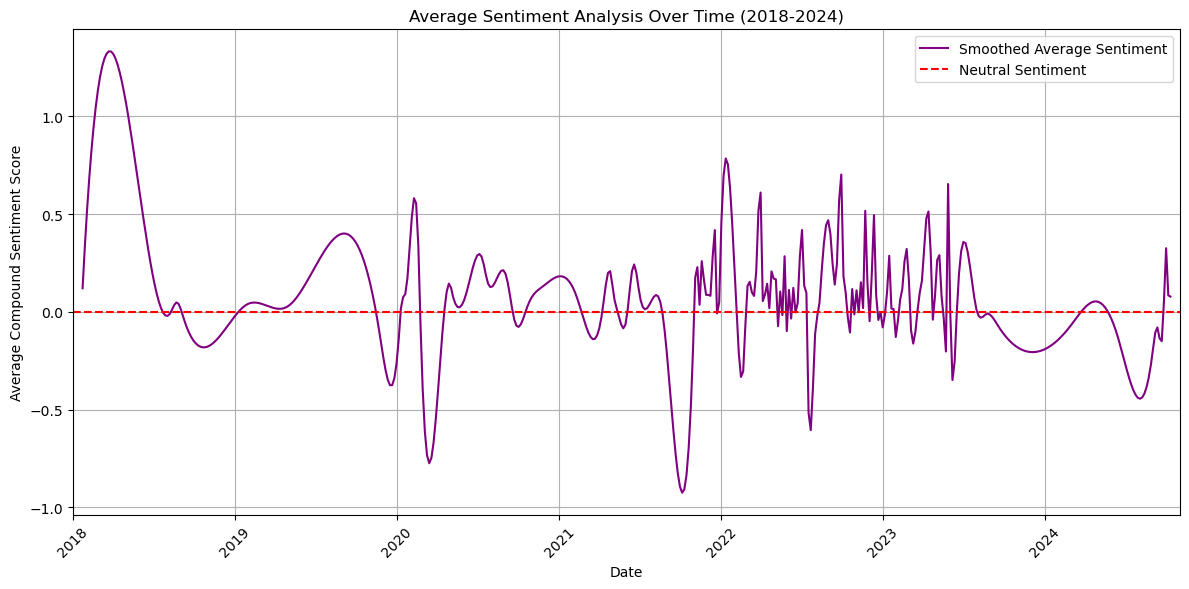

In [61]:
# Load the JSON data from the file
with open('combined_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Check if data is a list
if isinstance(data, list):
    sentiment_analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = []

    # Process each video entry
    for entry in data:
        # Extract the posted date
        posted_date = pd.to_datetime(entry['posted_date'])

        # Analyzing the title
        title_score = sentiment_analyzer.polarity_scores(entry['title'])
        sentiment_scores.append([posted_date, title_score['compound']])

        # Analyzing the comments
        for comment in entry.get('top_50_comments', []):  # Safely get comments
            comment_score = sentiment_analyzer.polarity_scores(comment)
            sentiment_scores.append([posted_date, comment_score['compound']])

    # Convert to DataFrame
    sentiment_df = pd.DataFrame(sentiment_scores, columns=['date', 'compound'])

    # Group by date and get average sentiment
    avg_sentiment = sentiment_df.groupby(sentiment_df['date'].dt.date)['compound'].mean().reset_index()

    # Convert date for plotting
    avg_sentiment['date'] = pd.to_datetime(avg_sentiment['date'])

    # Filter data for dates between 2018 and 2025
    avg_sentiment = avg_sentiment[(avg_sentiment['date'] >= '2018-01-01') & (avg_sentiment['date'] <= '2024-10-31')]

    # Prepare data for spline
    x = avg_sentiment['date'].map(datetime.timestamp).to_numpy()  # Convert datetime to timestamps
    y = avg_sentiment['compound'].to_numpy()

    # Create spline
    x_spline = np.linspace(x.min(), x.max(), 500)  # 500 points for the smooth curve
    spline = make_interp_spline(x, y, k=3)  # Cubic spline
    y_spline = spline(x_spline)

    # Convert timestamps back to dates for plotting
    x_spline_dates = pd.to_datetime(x_spline, unit='s')

    # Plotting the spline of average sentiment over time
    plt.figure(figsize=(12, 6))
    plt.plot(x_spline_dates, y_spline, color='purple', marker='', label='Smoothed Average Sentiment')
    plt.title('Average Sentiment Analysis Over Time (2018-2024)')
    plt.xlabel('Date')
    plt.ylabel('Average Compound Sentiment Score')
    plt.axhline(0, color='r', linestyle='--', label='Neutral Sentiment')  # Neutral line
    
    # Set x-limits as datetime objects
    plt.xlim(pd.to_datetime('2018-01-01'), pd.to_datetime('2024-10-31'))  # Limit x-axis to the specified range
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print("Unexpected data format in JSON file. Expected a list of entries.")


In [ ]:
# # Function to read the JSON file
# def read_data_from_json(file_path):
#     with open(file_path, 'r') as file:
#         data = [json.loads(line) for line in file]
#     return data

# file_path = 'sentiment_output.json'
# data = read_data_from_json(file_path) 

# # Converting the data to a dataFrame
# df = pd.DataFrame(data)

# def get_sentiment_category(sentiment):
#     if sentiment['pos'] > sentiment['neg'] and sentiment['pos'] > sentiment['neu']:
#         return 'positive'
#     elif sentiment['neg'] > sentiment['pos'] and sentiment['neg'] > sentiment['neu']:
#         return 'negative'
#     else:
#         return 'neutral'

# df['sentiment'] = df['sentiment'].apply(get_sentiment_category)

# sentiment_counts = df['sentiment'].value_counts()
# print("Sentiment Counts:")
# print(sentiment_counts)

# # Function to generate word cloud of all sentiment oreintations
# def generate_word_cloud(text, title):
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(title)
#     plt.axis('off')
#     plt.show()
    
# # Generate word clouds for each sentiment
# for sentiment in ['positive', 'negative', 'neutral']:
#     sentiment_text = ' '.join(df[df['sentiment'] == sentiment]['text'])
#     generate_word_cloud(sentiment_text, f'{sentiment.capitalize()} Sentiment Word Cloud')